In [1]:
# importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176518,122804.0,1.867633,0.067490,-2.083760,2.949168,2.798819,4.513581,-0.459531,1.013802,-0.603922,...,0.064481,0.346401,0.037249,0.720629,0.339727,0.209881,-0.010506,-0.061317,19.32,0
283094,171370.0,-10.243984,8.517532,-6.591644,-2.460064,-3.135762,-1.112216,-2.164932,3.746472,4.803544,...,-0.996068,-1.425127,0.660345,-1.235856,1.492283,0.295328,2.177236,1.240884,10.76,0
45955,42579.0,-3.529237,-1.085031,0.599323,-1.531427,-1.084952,-0.020062,1.592441,-0.500454,-0.928957,...,-0.538717,0.445493,0.360510,0.307602,0.745300,-0.319171,0.674855,0.267995,372.62,0
1582,1233.0,-0.956865,1.483801,1.601873,0.884115,-0.094897,-0.015144,0.305496,0.443680,-0.567253,...,-0.238321,-0.462552,-0.268929,-0.094198,0.524294,-0.364814,0.227555,0.078699,1.49,0
216856,140662.0,-0.348561,0.813080,0.801079,-0.417471,0.132750,0.186855,0.167475,0.046369,0.260304,...,0.088899,0.104370,0.302994,0.753871,-1.752069,-0.259744,-0.274304,0.266956,4.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'No Fraud (0) vs. Fraud (1)')

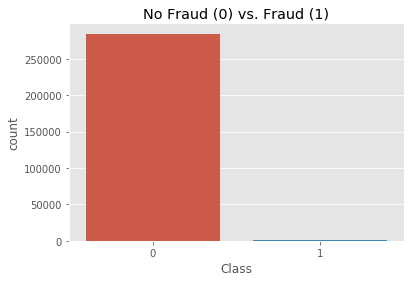

In [4]:
# taking a closer look at the class variable
sns.countplot('Class', data = df)
plt.title('No Fraud (0) vs. Fraud (1)')

In [5]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [6]:
y.sum()

# Only 492 positives

492

In [7]:
# imports 
from imblearn.over_sampling import RandomOverSampler

# random oversampling
ros = RandomOverSampler(random_state=42)
X_01, y_01 = ros.fit_resample(x, y)

# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_01).items()))

[(0, 284315), (1, 284315)]


In [8]:
y_01[0:50,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
y_01.sum()

# There are indeed 284315 values after resampling

284315

In [10]:
y_01

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Try to get square root of number of feature for max depth of XGBoost

In [31]:
from imblearn.over_sampling import ADASYN
X = df.drop(['Class'], axis=1)
y = df['Class']
X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)
print("Number of Xs and Ys for ADASYN:")
print(sorted(Counter(y_adasyn).items()))
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.1, random_state=42)

Number of Xs and Ys for ADASYN:
[(0, 284315), (1, 284298)]


In [34]:
X_train.shape[1]

30

In [37]:
import math
a = math.ceil(math.sqrt(X_train.shape[1]))
print(a)

6


In [ ]:
# Test standardization function

In [18]:
columns = df.columns.values.tolist()
columns.remove('Class')
print(columns)

test = df['V1']

test = (test - test.mean())/test.std()

test.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


count    2.848070e+05
mean    -2.316949e-17
std      1.000000e+00
min     -2.879850e+01
25%     -4.698909e-01
50%      9.245335e-03
75%      6.716927e-01
max      1.253349e+00
Name: V1, dtype: float64

In [19]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964,0
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474,0
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684,0
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534,0
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403,0
5,-1.996537,-0.217474,0.581674,0.752584,-0.118833,0.305008,-0.022313,0.384935,0.217954,-0.517618,...,-0.283522,-0.771426,-0.042273,-0.613272,-0.446583,0.219637,0.628899,0.245636,-0.338556,0
6,-1.996495,0.627794,0.085389,0.029923,0.849382,0.139019,0.204694,-0.004170,0.067997,0.423217,...,-0.228333,-0.373032,-0.246779,-1.287970,1.439034,-0.533435,0.085492,0.015656,-0.333278,0
7,-1.996432,-0.328928,0.858691,0.708575,-0.347630,0.687510,0.321345,0.905858,-3.188224,0.560128,...,2.645884,-1.399273,0.092085,-1.072752,-0.796632,-0.107075,-2.990148,-3.288077,-0.190107,0
8,-1.996432,-0.456572,0.173291,-0.074652,-0.191774,1.934146,2.793589,0.299205,0.712590,-0.356851,...,-0.099963,-0.369424,-0.327055,1.670266,0.715942,-0.796632,0.029104,0.431419,0.019392,0
9,-1.996390,-0.172697,0.678004,0.688780,-0.156926,0.361791,-0.185218,0.526705,0.058223,-0.670586,...,-0.336155,-0.873297,-0.193438,-0.635766,-0.133773,0.195341,0.610009,0.251681,-0.338516,0


In [ ]:
# Test if finding actual accuracy with all fraud points work

In [20]:
allpositive = df[df['Class'] == 1].copy()
x_positive = allpositive.drop(['Class'], axis=1)
y_positive = allpositive['Class']
y_pospredict = store[model].predict(x_positive)
accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
store['actual_accuracy'] = accuracy_positive

In [21]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
X_resampled2, y_resampled2 = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled2).items()))

[(0, 284315), (1, 284315)]


In [ ]:
# importing ADASYN
from imblearn.over_sampling import ADASYN

# applying ADASYN
X_resampled3, y_resampled3 = ADASYN().fit_resample(x, y)
print(sorted(Counter(y_resampled3).items()))

In [ ]:
# BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

X_resampled4, y_resampled4 = BorderlineSMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled4).items()))

In [ ]:
# def model_train(X, Y):
#     # Define search parameter values
#     depth = [5,10,15,20]
#     tree_amt = [50,100,150]
#     RFC = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=50)

#     # Create a parameter grid: map the parameter names to search values
#     param_grid = dict(max_depth=depth, n_estimators=tree_amt)
#     print(param_grid)

#     # Instantiate and fit the grid
#     grid = GridSearchCV(RFC, param_grid, cv=10, scoring='accuracy')
#     grid.fit(X,Y)
    
#     return grid

In [ ]:
# naive_sampling_model = model_train(X_resampled, y_resampled)

In [ ]:
#     def model_normalnaive(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         return self.initialize_model(df, testratio, text, "naive", modelname)

#     def model_w_standardize(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "naive", modelname)

#     def model_smote(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "smote", modelname)
    
#     def model_adasyn(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "adasyn", modelname)